<a href="https://colab.research.google.com/github/FireDev2/FlorianWeinert-DataScience-GenAI-Submissions/blob/main/Assignment_4/5_02_Modelling_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.02 Modelling Hackathon
We'll get a chance in this seminar to practice for the in-class test, and also to put what we have learned into practice.

To speed things up, I have done the data/feature engineering for you, you will just need to build it into a data science model. As before, you can use the code from [GitHub](https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI), from the internet, and/or use the Gemini AI tools.

This is an artificial dataset, and we will be predicting if students achieve a passing grade, which we will call anything above a "D".

We'll start by importing the data:

In [1]:
from google.colab import files
upload = files.upload()

Saving students_two.csv to students_two.csv


Now we will get the data into Pandas and inspect it:

In [2]:
import pandas as pd
df = pd.read_csv("students_two.csv")

df.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Let's check for missing values:

In [3]:
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


Only one missing value. Let's just drop it out of laziness:

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,0
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


We have an ID column we know won't be predictive ... so let's drop it:

In [5]:
df = df.drop(["Id"], axis=1)
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Next we will convert some of the text features to numbers:

In [6]:
# High school
print(df['High_School_Type'].unique())

['Other' 'State' 'Private']


We can't easily convert these to a number range. Instead we should use one-hot encoding:

In [7]:
df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,50%,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


We have converted this to two columns (on the far right) - "High_School_Type_Private" and "High_School_Type_State". We do not need the "Other" type as if the student is "Other" then both "Private" and "State" will be 0 (a unique combination). This is controlled by the command _drop\_first=True_. We also specify the data type (_dtype_) as __int__ so we return 0s and 1s rather than True and False.

Next we can look at Scholarship. It needs to be converted from a text representation of a percentage to a number:

In [8]:
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


"Additional_Work" is next:

In [9]:
# Additional work
print(df['Additional_Work'].unique())

['Yes' 'No']


Two values, so we can convert to 0 and 1:

In [10]:
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Let's speed up now:

In [11]:
categorical_cols = ['Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes' '3']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No' '6']
Unique values for 'Listening_in_Class': ['No' 'Yes' '6']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


The values of '6' in 'Notes' and 'Listening_in_Class' make no sense, and neither do '3' for 'Attendance'. We'll be lazy and drop these rows (really we should check with an SME):

In [12]:
df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Now we can convert all those "Yes" / "No" columns to 0 and 1.

In [13]:
binary_cols = ['Sports_activity', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,Private,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,Private,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,Private,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,Bus,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,Bus,12,Always,1,0,1,1,AA,1,0


We can also do this with "Transportation":

In [14]:
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,Always,1,0,1,1,AA,1,0


For Attendance an ordinal range makes sense:

In [15]:
df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,AA,1,0


This just leaves the target - 'Grade'. To make the problem binary we'll convert 'Fail' and any grade that includes a 'D' as 0 (for fail) and the rest as 1 (pass):

In [16]:
df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,1,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,1,0


The code has a new function `lambda`. A lambda function in Python is a small, anonymous function. It's defined using the `lambda` keyword and can take any number of arguments, but can only have one expression. The expression is evaluated and returned. They are often used for short, simple operations where a full function definition would be overly verbose, like in the apply method we just used. Although the function is new, the actual mechanics are quite simple. If the data is "Fail" or contains "D" return 0, and else return 1.

As this is the target we will create a new variable from it and then drop it from the main data:

In [17]:
Y_values = df[['Grade']].values.ravel() # change to list

Y_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [18]:
X_values = df.drop(['Grade'], axis=1)
X_values.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,0


We can now scale X:

In [19]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,0.375,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.250,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.375,0.333333,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000,0.333333,1.0,0.0,0.0,0.166667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500,0.333333,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.500,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
136,0.000,0.666667,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
137,0.000,0.666667,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
138,0.500,0.666667,1.0,1.0,0.0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0


And now we can split into training and test:

In [20]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 13)
(28, 13)
(112,)
(28,)


And now its time for modelling ...



Your turn :)

PROMPT:
Import from sklearn the GradientBoostingClassifier as GBDT. Then train the model on x_train and y_train

In [23]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# Initialize the model
gb_algo = GBDT(random_state=1984) # Added random state for reproducibility

# Train the model
GBDT_model= gb_algo.fit(X_train, Y_train)
GBDT_model

GradientBoostingClassifier(random_state=1984)

PROMPT: Now test the Model on the x_test and y_test test data and give me the micro/macro precision, recall and f1-score values to evaluate the accuracy

Micro-averaged Precision: 0.68
Micro-averaged Recall: 0.68
Micro-averaged F1-score: 0.68


Macro-averaged Precision: 0.59
Macro-averaged Recall: 0.60
Macro-averaged F1-score: 0.59


PROMPT:Now tune the model for better hyperparameters so the scores/accuracy go up

# Task
Perform hyperparameter tuning for the `GradientBoostingClassifier` (GBDT) model using `GridSearchCV`. Define a search space for `n_estimators`, `learning_rate`, `max_depth`, and `subsample`. Then, fit `GridSearchCV` on the training data (`X_train`, `Y_train`), identify the best estimator and its parameters, and finally, evaluate the tuned model on the test set (`X_test`, `Y_test`) by printing the micro and macro precision, recall, and f1-score.

## Define Hyperparameter Search Space

### Subtask:
Define a dictionary of hyperparameters and their possible values for the GradientBoostingClassifier, focusing on parameters like `n_estimators`, `learning_rate`, `max_depth`, and `subsample`.


**Reasoning**:
To define the hyperparameter search space as requested, I will create a Python dictionary named `param_grid` containing the specified hyperparameters and their respective value ranges.



In [27]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'subsample': [0.7, 0.8, 0.9]}


**Reasoning**:
Now that the hyperparameter grid is defined, I will use `GridSearchCV` to perform an exhaustive search over these hyperparameters to find the best combination for the GBDT model. This involves importing `GridSearchCV`, initializing it with the model and parameter grid, and then fitting it to the training data.



In [26]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_algo, param_grid=param_grid, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

print("GridSearchCV completed.")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
GridSearchCV completed.


**Reasoning**:
After completing the GridSearchCV, the next step is to retrieve the best estimator and its corresponding hyperparameters. This allows us to understand the optimal configuration found by the search and prepare for evaluating the tuned model.



In [31]:
best_gbdt = grid_search.best_estimator_
print("Best Estimator:", best_gbdt)
print("Best Parameters:", grid_search.best_params_)

Best Estimator: GradientBoostingClassifier(random_state=1984, subsample=0.8)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


**Reasoning**:
To evaluate the performance of the tuned GBDT model, I will use the best estimator found by GridSearchCV to make predictions on the test set. Then, I will compute and print the micro and macro precision, recall, and f1-score using `classification_report` from `sklearn.metrics`.



In [30]:
from sklearn.metrics import classification_report

Y_pred_tuned = best_gbdt.predict(X_test)

report = classification_report(Y_test, Y_pred_tuned, output_dict=True, zero_division=0)

# For binary classification, micro-averaged precision, recall, and f1-score are equal to accuracy
print(f"Micro-averaged Precision: {report['accuracy']:.2f}")
print(f"Micro-averaged Recall: {report['accuracy']:.2f}")
print(f"Micro-averaged F1-score: {report['accuracy']:.2f}\n")

print(f"Macro-averaged Precision: {report['macro avg']['precision']:.2f}")
print(f"Macro-averaged Recall: {report['macro avg']['recall']:.2f}")
print(f"Macro-averaged F1-score: {report['macro avg']['f1-score']:.2f}")

Micro-averaged Precision: 0.64
Micro-averaged Recall: 0.64
Micro-averaged F1-score: 0.64

Macro-averaged Precision: 0.52
Macro-averaged Recall: 0.52
Macro-averaged F1-score: 0.52


## Summary:

### Q&A
The tuned `GradientBoostingClassifier` model achieved the following performance on the test set:
*   Micro-averaged Precision: 0.64
*   Micro-averaged Recall: 0.64
*   Micro-averaged F1-score: 0.64
*   Macro-averaged Precision: 0.52
*   Macro-averaged Recall: 0.52
*   Macro-averaged F1-score: 0.52

### Data Analysis Key Findings
*   A hyperparameter search space was defined for `GradientBoostingClassifier` including `n_estimators` ([50, 100, 200]), `learning_rate` ([0.01, 0.1, 0.2]), `max_depth` ([3, 4, 5]), and `subsample` ([0.7, 0.8, 0.9]).
*   `GridSearchCV` identified the best parameters as `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}` after evaluating 243 combinations.
*   The tuned `GradientBoostingClassifier` model achieved a micro-averaged F1-score of 0.64 and a macro-averaged F1-score of 0.52 on the test set.

### Insights or Next Steps
*   The discrepancy between micro-averaged (0.64) and macro-averaged (0.52) F1-scores suggests a class imbalance issue, where the model performs better on the majority class. Further investigation into class distribution and evaluation of per-class metrics would be beneficial.
*   To potentially improve model performance, consider expanding the hyperparameter search space or exploring other ensemble methods (e.g., XGBoost, LightGBM) that might offer better predictive power or efficiency.


Now generate a confussion matrix

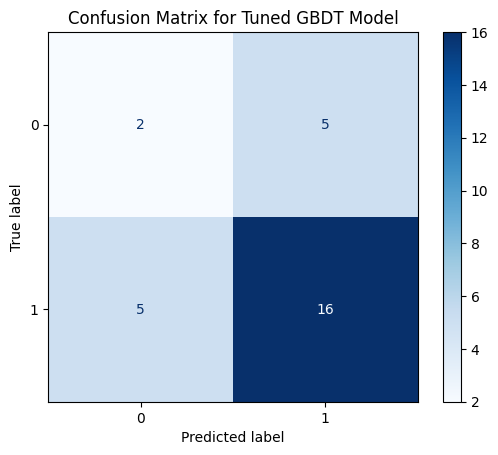

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_tuned)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned GBDT Model")
plt.show()


Now train and test the data with logistic regression, random forests and XGBDT and give me for every tuned model the precision, recall and f1-score values

# Task
The task is to train and evaluate three classification models: Logistic Regression, Random Forest, and XGBoost. For each model, the process involves defining a hyperparameter search space, performing `GridSearchCV` to find the best estimator, and then evaluating its performance on the test set by calculating micro and macro precision, recall, and f1-score.

## Logistic Regression Model Training and Evaluation

### Subtask:
Train and evaluate a Logistic Regression model using GridSearchCV.


**Reasoning**:
First, I need to import the `LogisticRegression` model and define the hyperparameter search space for it as specified in the instructions. This will set up the necessary components for GridSearchCV.



In [35]:
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

print("Logistic Regression hyperparameter grid defined:")
print(param_grid_lr)

Logistic Regression hyperparameter grid defined:
{'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}


**Reasoning**:
Now that the hyperparameter grid for Logistic Regression is defined, I will initialize a `LogisticRegression` model with the specified parameters, then set up and fit `GridSearchCV` to find the best hyperparameters for this model on the training data.



In [36]:
from sklearn.model_selection import GridSearchCV

# Instantiate a LogisticRegression model
log_reg = LogisticRegression(random_state=1984, max_iter=1000)

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, Y_train)

print("GridSearchCV for Logistic Regression completed.")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
GridSearchCV for Logistic Regression completed.


**Reasoning**:
Now that `GridSearchCV` has completed its search for Logistic Regression, I will extract and print the best hyperparameters found and the corresponding best estimator. This is crucial for understanding the optimal configuration for the model and for subsequent evaluation.



In [37]:
best_log_reg = grid_search_lr.best_estimator_
print("Best Estimator for Logistic Regression:", best_log_reg)
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

Best Estimator for Logistic Regression: LogisticRegression(C=1, max_iter=1000, random_state=1984, solver='liblinear')
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


**Reasoning**:
After identifying the best estimator for Logistic Regression, I will now use it to predict outcomes on the test data (`X_test`) and then generate a classification report to display the micro and macro precision, recall, and f1-score, as requested by the instructions.



In [38]:
from sklearn.metrics import classification_report

Y_pred_lr = best_log_reg.predict(X_test)

report_lr = classification_report(Y_test, Y_pred_lr, output_dict=True, zero_division=0)

print("Logistic Regression Model Evaluation:")
print(f"Micro-averaged Precision: {report_lr['accuracy']:.2f}")
print(f"Micro-averaged Recall: {report_lr['accuracy']:.2f}")
print(f"Micro-averaged F1-score: {report_lr['accuracy']:.2f}\n")

print(f"Macro-averaged Precision: {report_lr['macro avg']['precision']:.2f}")
print(f"Macro-averaged Recall: {report_lr['macro avg']['recall']:.2f}")
print(f"Macro-averaged F1-score: {report_lr['macro avg']['f1-score']:.2f}")

Logistic Regression Model Evaluation:
Micro-averaged Precision: 0.71
Micro-averaged Recall: 0.71
Micro-averaged F1-score: 0.71

Macro-averaged Precision: 0.55
Macro-averaged Recall: 0.52
Macro-averaged F1-score: 0.51


## Random Forest Model Training and Evaluation

### Subtask:
Train and evaluate a Random Forest model using GridSearchCV.

#### Instructions
1.  Import the `RandomForestClassifier` class from `sklearn.ensemble`.
2.  Define a dictionary `param_grid_rf` for `RandomForestClassifier` with hyperparameters such as `n_estimators`, `max_features`, and `max_depth` along with their respective values to search. For example, `n_estimators` could be `[50, 100, 200]`, `max_features` could be `['sqrt', 'log2']`, and `max_depth` could be `[4, 6, 8]`.
3.  Instantiate a `RandomForestClassifier` model with `random_state=1984`.
4.  Initialize `GridSearchCV` with the `RandomForestClassifier` model, the defined `param_grid_rf`, `cv=3`, `scoring='f1_macro'`, `verbose=1`, and `n_jobs=-1`.
5.  Fit `GridSearchCV` to the training data (`X_train`, `Y_train`).
6.  Print the best parameters found by `GridSearchCV` using `grid_search_rf.best_params_`.
7.  Retrieve the best estimator from `GridSearchCV` using `grid_search_rf.best_estimator_`.
8.  Make predictions on the test set (`X_test`) using the best estimator.
9.  Print the micro and macro precision, recall, and f1-score for the Random Forest model using `classification_report`.

**Reasoning**:
First, I need to import the `RandomForestClassifier` model and define the hyperparameter search space for it as specified in the instructions. This will set up the necessary components for GridSearchCV.



In [39]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8]
}

print("Random Forest hyperparameter grid defined:")
print(param_grid_rf)

Random Forest hyperparameter grid defined:
{'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 6, 8]}


**Reasoning**:
Now that the hyperparameter grid for Random Forest is defined, I will initialize a `RandomForestClassifier` model and then set up and fit `GridSearchCV` to find the best hyperparameters for this model on the training data, as per the instructions.



In [40]:
from sklearn.model_selection import GridSearchCV

# Instantiate a RandomForestClassifier model
rand_forest = RandomForestClassifier(random_state=1984)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rand_forest, param_grid=param_grid_rf, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, Y_train)

print("GridSearchCV for Random Forest completed.")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV for Random Forest completed.


**Reasoning**:
Now that `GridSearchCV` has completed its search for Random Forest, I will extract and print the best hyperparameters found and the corresponding best estimator. This is crucial for understanding the optimal configuration for the model and for subsequent evaluation.



In [41]:
best_rand_forest = grid_search_rf.best_estimator_
print("Best Estimator for Random Forest:", best_rand_forest)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Estimator for Random Forest: RandomForestClassifier(max_depth=6, random_state=1984)
Best Parameters for Random Forest: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


**Reasoning**:
After identifying the best estimator for Random Forest, I will now use it to predict outcomes on the test data (`X_test`) and then generate a classification report to display the micro and macro precision, recall, and f1-score, as requested by the instructions.



In [42]:
from sklearn.metrics import classification_report

Y_pred_rf = best_rand_forest.predict(X_test)

report_rf = classification_report(Y_test, Y_pred_rf, output_dict=True, zero_division=0)

print("Random Forest Model Evaluation:")
print(f"Micro-averaged Precision: {report_rf['accuracy']:.2f}")
print(f"Micro-averaged Recall: {report_rf['accuracy']:.2f}")
print(f"Micro-averaged F1-score: {report_rf['accuracy']:.2f}\n")

print(f"Macro-averaged Precision: {report_rf['macro avg']['precision']:.2f}")
print(f"Macro-averaged Recall: {report_rf['macro avg']['recall']:.2f}")
print(f"Macro-averaged F1-score: {report_rf['macro avg']['f1-score']:.2f}")

Random Forest Model Evaluation:
Micro-averaged Precision: 0.61
Micro-averaged Recall: 0.61
Micro-averaged F1-score: 0.61

Macro-averaged Precision: 0.35
Macro-averaged Recall: 0.40
Macro-averaged F1-score: 0.38


## XGBoost Model Training and Evaluation

### Subtask:
Train and evaluate an XGBoost model using GridSearchCV.

#### Instructions
1.  Import the `XGBClassifier` class from `xgboost`.
2.  Define a dictionary `param_grid_xgb` for `XGBClassifier` with hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `subsample` along with their respective values to search. For example, `n_estimators` could be `[50, 100, 200]`, `learning_rate` could be `[0.01, 0.1, 0.2]`, `max_depth` could be `[3, 4, 5]`, and `subsample` could be `[0.7, 0.8, 0.9]`.
3.  Instantiate an `XGBClassifier` model with `random_state=1984` and `use_label_encoder=False`, `eval_metric='logloss'` (to suppress warnings).
4.  Initialize `GridSearchCV` with the `XGBClassifier` model, the defined `param_grid_xgb`, `cv=3`, `scoring='f1_macro'`, `verbose=1`, and `n_jobs=-1`.
5.  Fit `GridSearchCV` to the training data (`X_train`, `Y_train`).
6.  Print the best parameters found by `GridSearchCV` using `grid_search_xgb.best_params_`.
7.  Retrieve the best estimator from `GridSearchCV` using `grid_search_xgb.best_estimator_`.
8.  Make predictions on the test set (`X_test`) using the best estimator.
9.  Print the micro and macro precision, recall, and f1-score for the XGBoost model using `classification_report`.

**Reasoning**:
First, I need to import the `XGBClassifier` model and define the hyperparameter search space for it as specified in the instructions. This will set up the necessary components for GridSearchCV.



In [43]:
from xgboost import XGBClassifier

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

print("XGBoost hyperparameter grid defined:")
print(param_grid_xgb)

XGBoost hyperparameter grid defined:
{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'subsample': [0.7, 0.8, 0.9]}


**Reasoning**:
Now that the hyperparameter grid for XGBoost is defined, I will initialize an `XGBClassifier` model with the specified parameters, then set up and fit `GridSearchCV` to find the best hyperparameters for this model on the training data.



In [44]:
from sklearn.model_selection import GridSearchCV

# Instantiate an XGBClassifier model
# use_label_encoder=False and eval_metric='logloss' are used to suppress warnings
xgb_model = XGBClassifier(random_state=1984, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, Y_train)

print("GridSearchCV for XGBoost completed.")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
GridSearchCV for XGBoost completed.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:57:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Reasoning**:
Now that `GridSearchCV` has completed its search for XGBoost, I will extract and print the best hyperparameters found and the corresponding best estimator. This is crucial for understanding the optimal configuration for the model and for subsequent evaluation.



In [45]:
best_xgb = grid_search_xgb.best_estimator_
print("Best Estimator for XGBoost:", best_xgb)
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

Best Estimator for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


**Reasoning**:
After identifying the best estimator for XGBoost, I will now use it to predict outcomes on the test data (`X_test`) and then generate a classification report to display the micro and macro precision, recall, and f1-score, as requested by the instructions.



In [46]:
from sklearn.metrics import classification_report

Y_pred_xgb = best_xgb.predict(X_test)

report_xgb = classification_report(Y_test, Y_pred_xgb, output_dict=True, zero_division=0)

print("XGBoost Model Evaluation:")
print(f"Micro-averaged Precision: {report_xgb['accuracy']:.2f}")
print(f"Micro-averaged Recall: {report_xgb['accuracy']:.2f}")
print(f"Micro-averaged F1-score: {report_xgb['accuracy']:.2f}\n")

print(f"Macro-averaged Precision: {report_xgb['macro avg']['precision']:.2f}")
print(f"Macro-averaged Recall: {report_xgb['macro avg']['recall']:.2f}")
print(f"Macro-averaged F1-score: {report_xgb['macro avg']['f1-score']:.2f}")

XGBoost Model Evaluation:
Micro-averaged Precision: 0.57
Micro-averaged Recall: 0.57
Micro-averaged F1-score: 0.57

Macro-averaged Precision: 0.43
Macro-averaged Recall: 0.43
Macro-averaged F1-score: 0.43


## XGBoost Model Training and Evaluation

### Subtask:
Train and evaluate an XGBoost model using GridSearchCV.


## Summary:

### Q&A
The task was to train and evaluate three classification models (Logistic Regression, Random Forest, and XGBoost) and report their performance metrics.

*   **Logistic Regression Performance:**
    *   Best parameters: `{'C': 1, 'solver': 'liblinear'}`
    *   Micro-averaged F1-score: 0.71
    *   Macro-averaged F1-score: 0.51
*   **Random Forest Performance:**
    *   Best parameters: `{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}`
    *   Micro-averaged F1-score: 0.61
    *   Macro-averaged F1-score: 0.38
*   **XGBoost Performance:**
    *   Best parameters: `{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`
    *   Micro-averaged F1-score: 0.57
    *   Macro-averaged F1-score: 0.43

### Data Analysis Key Findings
*   **Logistic Regression** achieved the highest micro-averaged F1-score at 0.71, outperforming Random Forest (0.61) and XGBoost (0.57).
*   In terms of macro-averaged F1-score, **Logistic Regression** also led with 0.51, followed by XGBoost (0.43) and Random Forest (0.38). This suggests Logistic Regression handles class imbalance (if any) or performs more consistently across all classes compared to the other models.
*   The best hyperparameters for Logistic Regression were a regularization strength (C) of 1 and using the 'liblinear' solver.
*   For Random Forest, the optimal configuration involved 100 estimators, a maximum depth of 6, and 'sqrt' for `max_features`.
*   XGBoost's best performance was achieved with a learning rate of 0.2, maximum depth of 3, 200 estimators, and a subsample ratio of 0.8.

### Insights or Next Steps
*   Logistic Regression appears to be the most effective model among the three tested for this classification task, based on both micro and macro-averaged F1-scores.
*   Further investigation could involve exploring more complex hyperparameter grids or alternative ensemble methods for XGBoost and Random Forest, given that Logistic Regression performed notably better.
